In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preprocessing Environmental Data

In [40]:
import pandas as pd
import numpy as np

dataset_rainfall = pd.read_csv('/Users/34647859/OneDrive - Murdoch University/ICT678/CNN_LSTM_RF/Dataset/avg_rainfall_dataset.csv')
dataset_temp = pd.read_csv('/Users/34647859/OneDrive - Murdoch University/ICT678/CNN_LSTM_RF/Dataset/avg_max_temp_dataset.csv')
dataset_solar = pd.read_csv('/Users/34647859/OneDrive - Murdoch University/ICT678/CNN_LSTM_RF/Dataset/avg_solar_dataset.csv')


In [41]:
dataset_rainfall.head()

,Variety,Reason,Year,Study,Location,ZS49PlHt,ZS49 (no days),HrvPlHt,ZS91 (no days),GrYld(kg/ha),...,03_rainfall,04_rainfall,05_rainfall,06_rainfall,07_rainfall,08_rainfall,09_rainfall,10_rainfall,11_rainfall,12_rainfall
0,Commander,AUS-CTL,2014,NtL,STHPER,55.0,92.0,72.0,131.0,NaN,...,0.23871,0.82,4.922581,3.12,4.877419,3.451613,2.566667,1.193548,0.793333,0.0
1,Commander,AUS-CTL,2014,18Hrs,STHPER,38.0,63.0,55.0,108.0,NaN,...,0.23871,0.82,4.922581,3.12,4.877419,3.451613,2.566667,1.193548,0.793333,0.0
2,Commander,AUS-CTL,2015,TOP1,NaN,NaN,104.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Commander,AUS-CTL,2015,TOP2,NaN,NaN,105.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Commander,AUS-CTL,2015,TOP3,NaN,NaN,96.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
dataset_rainfall.drop(columns=['Variety', 'Reason', 'Study','Location', 'ZS49PlHt', 'HrvPlHt', 'ZS91 (no days)', 'ZS49 (no days)'], inplace=True)
dataset_solar.drop(columns=['Variety', 'Reason', 'Study','Location', 'ZS49PlHt', 'HrvPlHt', 'ZS91 (no days)', 'ZS49 (no days)'], inplace=True)
dataset_temp.drop(columns=['Variety', 'Reason', 'Study','Location', 'ZS49PlHt', 'HrvPlHt', 'ZS91 (no days)', 'ZS49 (no days)'], inplace=True)

In [43]:
dataset_rainfall.dropna(inplace=True)
dataset_temp.dropna(inplace=True)
dataset_solar.dropna(inplace=True)

print("RainfallL: ", dataset_rainfall.shape)
print("Solar: ", dataset_solar.shape)
print("Temperature: ", dataset_temp.shape)

RainfallL:  (2617, 14)
Solar:  (2617, 14)
Temperature:  (2617, 14)


In [44]:
dataset_solar.drop(columns=['Year'], inplace=True)
dataset_rainfall.drop(columns=['Year'], inplace=True)
dataset_temp.drop(columns=['Year'], inplace=True)

In [45]:
dataset_solar.shape

(2617, 13)

In [46]:
dataset_rainfall.head()

,GrYld(kg/ha),01_rainfall,02_rainfall,03_rainfall,04_rainfall,05_rainfall,06_rainfall,07_rainfall,08_rainfall,09_rainfall,10_rainfall,11_rainfall,12_rainfall
7,2410.5,0.000000,0.435714,2.812903,1.253333,0.529032,1.800000,1.754839,1.620000,0.326667,0.021429,0.746667,0.541935
8,4024.9,0.651613,0.006897,0.419355,2.380000,0.980645,3.020000,4.154839,2.245161,0.593333,0.374194,0.186667,0.077419
9,2360.5,0.032258,0.064286,0.632258,0.400000,1.006452,2.346667,1.187097,1.812903,0.846667,0.567742,0.448276,1.103226
10,3683.5,0.911111,0.041379,2.880000,1.220000,1.819355,1.180000,1.258065,1.800000,1.100000,0.948387,0.282759,1.787097
11,4060.0,0.329032,0.100000,1.374194,1.926667,2.116129,2.026667,1.638710,3.470968,1.882759,0.709677,0.944828,1.290323


In [47]:
dataset_rainfall.drop(columns=['01_rainfall','02_rainfall','03_rainfall','10_rainfall','11_rainfall','12_rainfall'], inplace=True)
dataset_solar.drop(columns=['01_solar','02_solar','03_solar','10_solar','11_solar','12_solar'], inplace=True)
dataset_temp.drop(columns=['01_temp_max','02_temp_max','03_temp_max','10_temp_max','11_temp_max','12_temp_max'], inplace=True)

In [48]:
dataset_temp.head()

,GrYld(kg/ha),04_temp_max,05_temp_max,06_temp_max,07_temp_max,08_temp_max,09_temp_max
7,2410.5,28.040000,24.593548,23.313333,20.867742,21.029032,25.343333
8,4024.9,27.386667,23.361290,19.676667,18.916129,19.361290,20.436667
9,2360.5,21.900000,17.651613,17.480000,15.151613,15.870968,19.143333
10,3683.5,20.853333,17.383871,14.313333,13.574194,13.741935,15.083333
11,4060.0,22.460000,18.506452,18.443333,15.880645,17.390323,20.031034


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_rainfall = MinMaxScaler()
scaler_solar = MinMaxScaler()
scaler_temperature = MinMaxScaler()

scaled_rainfall = scaler_rainfall.fit_transform(dataset_rainfall.drop(columns=['GrYld(kg/ha)']))
scaled_solar = scaler_solar.fit_transform(dataset_solar.drop(columns=['GrYld(kg/ha)']))
scaled_temperature = scaler_temperature.fit_transform(dataset_temp.drop(columns=['GrYld(kg/ha)']))

In [14]:
# Reshape data for LSTM input
X_rainfall = scaled_rainfall.reshape(-1, 6, 1)
X_solar = scaled_solar.reshape(-1, 6, 1)
X_temp = scaled_temperature.reshape(-1, 6, 1)

# Extract target variables
target_rainfall = dataset_rainfall['GrYld(kg/ha)'].values


In [15]:
X_rainfall.shape

(2617, 6, 1)

## Preprocessing Phenology Data

In [49]:
dataset_gene = pd.read_csv('/Users/34647859/OneDrive - Murdoch University/ICT678/CNN_LSTM_RF/Dataset/cleaned_dataset.csv')
dataset_gene.head()

,Reason,Year,Study,Location,GrYld(kg/ha),D1H00051861,D1H000263584,D1H000275564,D1H000277624,D1H000277628,...,L7H657085535,L7H657085541,L7H657104991,L7H657131781,L7H657146353,L7H657146356,L7H657147154,L7H657147171,L7H657147173,L7H657156298
0,1,1,4,1,2410.546686,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
1,1,2,4,1,4024.875000,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
2,1,1,4,2,2360.503472,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
3,1,2,4,2,3683.541667,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
4,1,1,4,0,4060.034722,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1


In [50]:
dataset_gene.isnull().sum()

Reason          0
Year            0
Study           0
Location        0
GrYld(kg/ha)    0
               ..
L7H657146356    0
L7H657147154    0
L7H657147171    0
L7H657147173    0
L7H657156298    0
Length: 30548, dtype: int64

In [51]:
dataset_gene.shape

(2617, 30548)

In [52]:
dataset_gene.dropna(subset=['GrYld(kg/ha)'], inplace=True)
dataset_gene.shape

(2617, 30548)

In [53]:
dataset_gene.head()

,Reason,Year,Study,Location,GrYld(kg/ha),D1H00051861,D1H000263584,D1H000275564,D1H000277624,D1H000277628,...,L7H657085535,L7H657085541,L7H657104991,L7H657131781,L7H657146353,L7H657146356,L7H657147154,L7H657147171,L7H657147173,L7H657156298
0,1,1,4,1,2410.546686,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
1,1,2,4,1,4024.875000,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
2,1,1,4,2,2360.503472,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
3,1,2,4,2,3683.541667,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
4,1,1,4,0,4060.034722,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1


In [27]:
X= dataset_gene.drop(columns=['GrYld(kg/ha)'], axis=1)
y = dataset_gene['GrYld(kg/ha)']

In [28]:
X.shape, y.shape

((2617, 30547), (2617,))

In [30]:
X.shape

(2617, 30547)

In [31]:
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


## Data Preprocessing

In [32]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def prepare_hybrid_model_data(dataset_rainfall, dataset_solar, dataset_temperature, dataset_gene,
                            sequence_length=6, test_size=0.2, random_state=42):
    """
    Prepare data for hybrid LSTM-CNN model ensuring aligned target variables

    Parameters:
    -----------
    dataset_rainfall : pd.DataFrame
        DataFrame containing rainfall data
    dataset_solar : pd.DataFrame
        DataFrame containing solar radiation data
    dataset_temperature : pd.DataFrame
        DataFrame containing temperature data
    dataset_gene : pd.DataFrame
        DataFrame containing genetic data
    sequence_length : int
        Length of sequence for LSTM input
    test_size : float
        Proportion of data to use for testing
    random_state : int
        Random seed for reproducibility

    Returns:
    --------
    dict : Dictionary containing all prepared data arrays and scalers
    """
    # Extract and align target variable
    target = dataset_gene['GrYld(kg/ha)'].values

    # Prepare LSTM inputs
    scaler_rainfall = StandardScaler()
    scaler_solar = StandardScaler()
    scaler_temp = StandardScaler()

    # Scale the time series data
    scaled_rainfall = scaler_rainfall.fit_transform(dataset_rainfall.drop('GrYld(kg/ha)', axis=1))
    scaled_solar = scaler_solar.fit_transform(dataset_solar.drop('GrYld(kg/ha)', axis=1))
    scaled_temp = scaler_temp.fit_transform(dataset_temperature.drop('GrYld(kg/ha)', axis=1))

    # Reshape for LSTM (samples, time steps, features)
    X_rainfall = scaled_rainfall.reshape(-1, sequence_length, 1)
    X_solar = scaled_solar.reshape(-1, sequence_length, 1)
    X_temp = scaled_temp.reshape(-1, sequence_length, 1)

    # Prepare CNN input
    scaler_gene = StandardScaler()
    X_gene = dataset_gene.drop('GrYld(kg/ha)', axis=1).values
    X_gene_scaled = scaler_gene.fit_transform(X_gene)
    X_gene_reshaped = X_gene_scaled.reshape(X_gene_scaled.shape[0], X_gene_scaled.shape[1], 1)

    # Split the data
    # We'll split all inputs using the same indices to maintain alignment
    X_rainfall_train, X_rainfall_test, \
    X_solar_train, X_solar_test, \
    X_temp_train, X_temp_test, \
    X_gene_train, X_gene_test, \
    y_train, y_test = train_test_split(X_rainfall, X_solar, X_temp,
                                      X_gene_reshaped, target,
                                      test_size=test_size,
                                      random_state=random_state)

    return {
        'X_rainfall_train': X_rainfall_train,
        'X_rainfall_test': X_rainfall_test,
        'X_solar_train': X_solar_train,
        'X_solar_test': X_solar_test,
        'X_temp_train': X_temp_train,
        'X_temp_test': X_temp_test,
        'X_gene_train': X_gene_train,
        'X_gene_test': X_gene_test,
        'y_train': y_train,
        'y_test': y_test,
        'scalers': {
            'rainfall': scaler_rainfall,
            'solar': scaler_solar,
            'temperature': scaler_temp,
            'gene': scaler_gene
        }
    }

## CNN Model & LSTM Model

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, LSTM, Dense, Dropout, Conv1D,
                                   MaxPooling1D, Flatten, Concatenate, BatchNormalization,
                                   Reshape)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow.keras.backend as K

class MultiInputAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(MultiInputAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(
            name="att_weight",
            shape=(input_shape[-1], 1),
            initializer="glorot_uniform",
            trainable=True
        )
        self.b = self.add_weight(
            name="att_bias",
            shape=(input_shape[1], 1),
            initializer="zeros",
            trainable=True
        )
        super(MultiInputAttention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

def create_hybrid_model(gene_features, sequence_length=6):
    """
    Create a hybrid LSTM-CNN model with attention
    """
    # LSTM inputs
    input_rainfall = Input(shape=(sequence_length, 1), name='rainfall_data')
    input_solar = Input(shape=(sequence_length, 1), name='solar_data')
    input_temperature = Input(shape=(sequence_length, 1), name='temperature_data')

    # LSTM branches with shared architecture
    def create_lstm_branch(input_tensor, name_prefix):
        x = LSTM(64, return_sequences=True, name=f'{name_prefix}_lstm1')(input_tensor)
        x = BatchNormalization(name=f'{name_prefix}_bn1')(x)
        x = Dropout(0.2, name=f'{name_prefix}_dropout1')(x)
        x = LSTM(32, return_sequences=False, name=f'{name_prefix}_lstm2')(x)
        x = BatchNormalization(name=f'{name_prefix}_bn2')(x)
        x = Dropout(0.2, name=f'{name_prefix}_dropout2')(x)
        return x

    # Process each LSTM branch
    lstm_rainfall = create_lstm_branch(input_rainfall, 'rainfall')
    lstm_solar = create_lstm_branch(input_solar, 'solar')
    lstm_temperature = create_lstm_branch(input_temperature, 'temperature')

    # Concatenate LSTM outputs
    lstm_concatenated = Concatenate(name='lstm_concatenate')(
        [lstm_rainfall, lstm_solar, lstm_temperature]
    )

    # CNN branch
    cnn_input = Input(shape=(gene_features, 1), name='gene_data')

    cnn_model = Conv1D(filters=32, kernel_size=2, activation='relu',
                      name='cnn_conv1')(cnn_input)
    cnn_model = BatchNormalization(name='cnn_bn1')(cnn_model)
    cnn_model = MaxPooling1D(pool_size=2, name='cnn_pool1')(cnn_model)
    cnn_model = Dropout(0.4, name='cnn_dropout1')(cnn_model)
    cnn_model = Flatten(name='cnn_flatten')(cnn_model)

    # Combine LSTM and CNN branches
    final_concat = Concatenate(name='final_concat')([cnn_model, lstm_concatenated])

    # Reshape for attention layer
    final_concat_reshaped = Reshape((1, -1))(final_concat)

    # Apply attention
    attention_output = MultiInputAttention()(final_concat_reshaped)

    # Dense layers
    dense = Dense(64, activation='relu', name='dense1')(attention_output)
    dense = BatchNormalization(name='dense_bn1')(dense)
    dense = Dropout(0.4, name='dense_dropout1')(dense)

    # Output layer
    output = Dense(1, name='output')(dense)

    # Create model
    model = Model(
        inputs=[input_rainfall, input_solar, input_temperature, cnn_input],
        outputs=output,
        name='hybrid_lstm_cnn'
    )

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=[RootMeanSquaredError()]
    )

    return model

# Create callbacks
def get_callbacks():
    return [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6,
            verbose=1
        )
    ]

In [34]:
# Prepare your data
prepared_data = prepare_hybrid_model_data(
    dataset_rainfall=dataset_rainfall,
    dataset_solar=dataset_solar,
    dataset_temperature=dataset_temp,
    dataset_gene=dataset_gene
)

# Get the number of genetic features from your data
gene_features = prepared_data['X_gene_train'].shape[1]

# Create the model
model = create_hybrid_model(gene_features=gene_features)

# Print model summary to verify architecture
model.summary()

# Train the model
history = model.fit(
    x=[
        prepared_data['X_rainfall_train'],
        prepared_data['X_solar_train'],
        prepared_data['X_temp_train'],
        prepared_data['X_gene_train']
    ],
    y=prepared_data['y_train'],
    validation_data=([
        prepared_data['X_rainfall_test'],
        prepared_data['X_solar_test'],
        prepared_data['X_temp_test'],
        prepared_data['X_gene_test']
    ], prepared_data['y_test']),
    epochs=100,
    batch_size=32,
    callbacks=get_callbacks(),
    verbose=1
)

Model: "hybrid_lstm_cnn"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ rainfall_data       │ (None, 6, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ solar_data          │ (None, 6, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temperature_data    │ (None, 6, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rainfall_lstm1      │ (None, 6, 64)     │     16,896 │ rainfall_data[0]… │
│ (LSTM)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ solar_lstm1 (LSTM)  │ (None, 6, 64)     │     16,896 │ solar_data[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temperature_lstm1   │ (None, 6, 64)     │     16,896 │ temperature_data… │
│ (LSTM)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gene_data           │ (None, 30547, 1)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rainfall_bn1        │ (None, 6, 64)     │        256 │ rainfall_lstm1[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ solar_bn1           │ (None, 6, 64)     │        256 │ solar_lstm1[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temperature_bn1     │ (None, 6, 64)     │        256 │ temperature_lstm… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cnn_conv1 (Conv1D)  │ (None, 30546, 32) │         96 │ gene_data[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rainfall_dropout1   │ (None, 6, 64)     │          0 │ rainfall_bn1[0][… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ solar_dropout1      │ (None, 6, 64)     │          0 │ solar_bn1[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temperature_dropou… │ (None, 6, 64)     │          0 │ temperature_bn1[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cnn_bn1             │ (None, 30546, 32) │        128 │ cnn_conv1[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rainfall_lstm2      │ (None, 32)        │     12,416 │ rainfall_dropout… │
│ (LSTM)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ solar_lstm2 (LSTM)  │ (None, 32)        │     12,416 │ solar_dropout1[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temperature_lstm2   │ (None, 32)        │     12,416 │ temperature_drop

 Total params: 31,863,778 (121.55 MB)

 Trainable params: 31,863,010 (121.55 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 59s 361ms/step - loss: 8463771.0000 - root_mean_squared_error: 2909.0754 - val_loss: 8482053.0000 - val_root_mean_squared_error: 2912.3965 - learning_rate: 0.0010
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 298ms/step - loss: 8704456.0000 - root_mean_squared_error: 2949.8262 - val_loss: 8470924.0000 - val_root_mean_squared_error: 2910.4851 - learning_rate: 0.0010
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - loss: 8533320.0000 - root_mean_squared_error: 2921.1108 - val_loss: 8453347.0000 - val_root_mean_squared_error: 2907.4641 - learning_rate: 0.0010
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - loss: 8575783.0000 - root_mean_squared_error: 2928.2578 - val_loss: 8418044.0000 - val_root_mean_squared_error: 2901.3865 - learning_rate: 0.0010
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 295ms/step - loss: 8622450.0000 - root_mean_squared_error: 2935.8298 - val_loss: 8383297.5000 - val_root_mean_squared_error: 2895.3926 - learning_rat

In [35]:
model.save('model.keras')

In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Training metrics
y_train_pred = model.predict([
    prepared_data['X_rainfall_train'],
    prepared_data['X_solar_train'],
    prepared_data['X_temp_train'],
    prepared_data['X_gene_train']
])

mse_train = mean_squared_error(prepared_data['y_train'], y_train_pred)
mae_train = mean_absolute_error(prepared_data['y_train'], y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(prepared_data['y_train'], y_train_pred)

print(f"MSE (Train): {mse_train:.4f}")
print(f"MAE (Train): {mae_train:.4f}")
print(f"RMSE (Train): {rmse_train:.4f}")
print(f"R2 (Train): {r2_train:.4f}")

# Test metrics
y_test_pred = model.predict([
    prepared_data['X_rainfall_test'],
    prepared_data['X_solar_test'],
    prepared_data['X_temp_test'],
    prepared_data['X_gene_test']
])

mse_test = mean_squared_error(prepared_data['y_test'], y_test_pred)
mae_test = mean_absolute_error(prepared_data['y_test'], y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(prepared_data['y_test'], y_test_pred)

print("\nTest Metrics:")
print(f"MSE (Test): {mse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"R2 (Test): {r2_test:.4f}")

66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step
MSE (Train): 354592.5247
MAE (Train): 456.5419
RMSE (Train): 595.4767
R2 (Train): 0.7159
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step

Test Metrics:
MSE (Test): 612099.0382
MAE (Test): 614.4961
RMSE (Test): 782.3676
R2 (Test): 0.4885


In [92]:
feature_names = list(dataset_gene.columns)
feature_names

['Reason',
 'Year',
 'Study',
 'Location',
 'GrYld(kg/ha)',
 'D1H00051861',
 'D1H000263584',
 'D1H000275564',
 'D1H000277624',
 'D1H000277628',
 'D1H000277656',
 'D1H000277673',
 'D1H000278185',
 'D1H000278243',
 'D1H000278386',
 'D1H000278388',
 'D1H000302934',
 'L1H000354142',
 'L1H000354182',
 'L1H000354219',
 'L1H000354276',
 'L1H000359768',
 'L1H000360992',
 'L1H000363095',
 'L1H000363113',
 'L1H000363130',
 'L1H000363137',
 'L1H000367310',
 'L1H000367337',
 'L1H000367437',
 'L1H000367663',
 'L1H000367672',
 'L1H000367738',
 'L1H000367758',
 'L1H000445471',
 'L1H000445479',
 'L1H000445487',
 'L1H000445515',
 'L1H000445611',
 'L1H000445627',
 'L1H000445657',
 'L1H000445749',
 'L1H000445759',
 'L1H000445931',
 'L1H000446037',
 'L1H000446074',
 'L1H000446403',
 'L1H000446649',
 'L1H000446664',
 'L1H000446742',
 'L1H000446759',
 'L1H000446813',
 'L1H000446827',
 'L1H000446929',
 'L1H000446930',
 'L1H000446978',
 'L1H000446985',
 'L1H000447028',
 'L1H000447055',
 'L1H000447085',
 'L1H0

17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step
Attention weights shape: (524, 488832)
Number of feature names: 30565
First few feature names: ['Total Rainfall at t-6 (mm)', 'Total Rainfall at t-5 (mm)', 'Total Rainfall at t-4 (mm)', 'Total Rainfall at t-3 (mm)', 'Total Rainfall at t-2 (mm)']


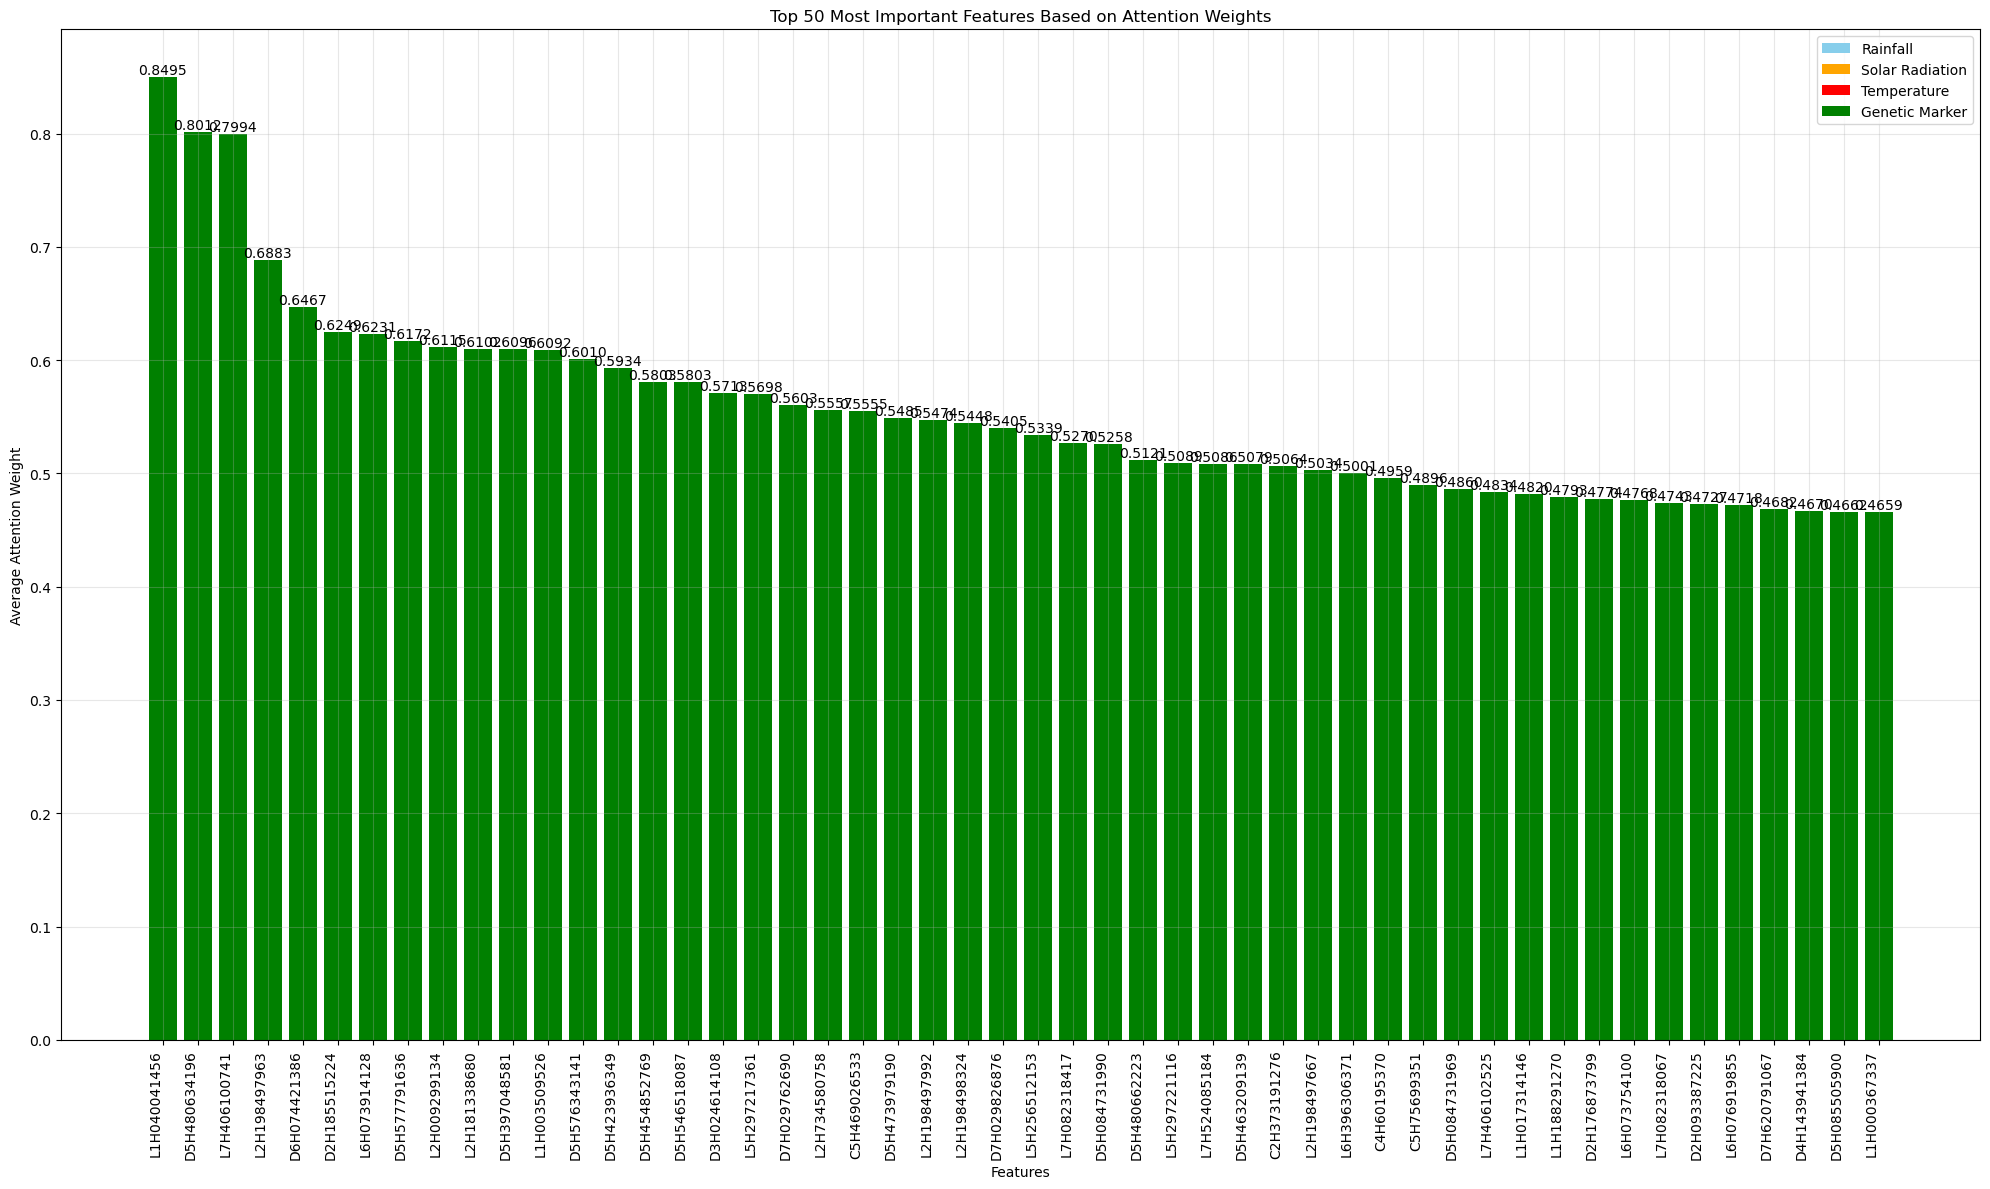


Generating Environmental Features visualization...


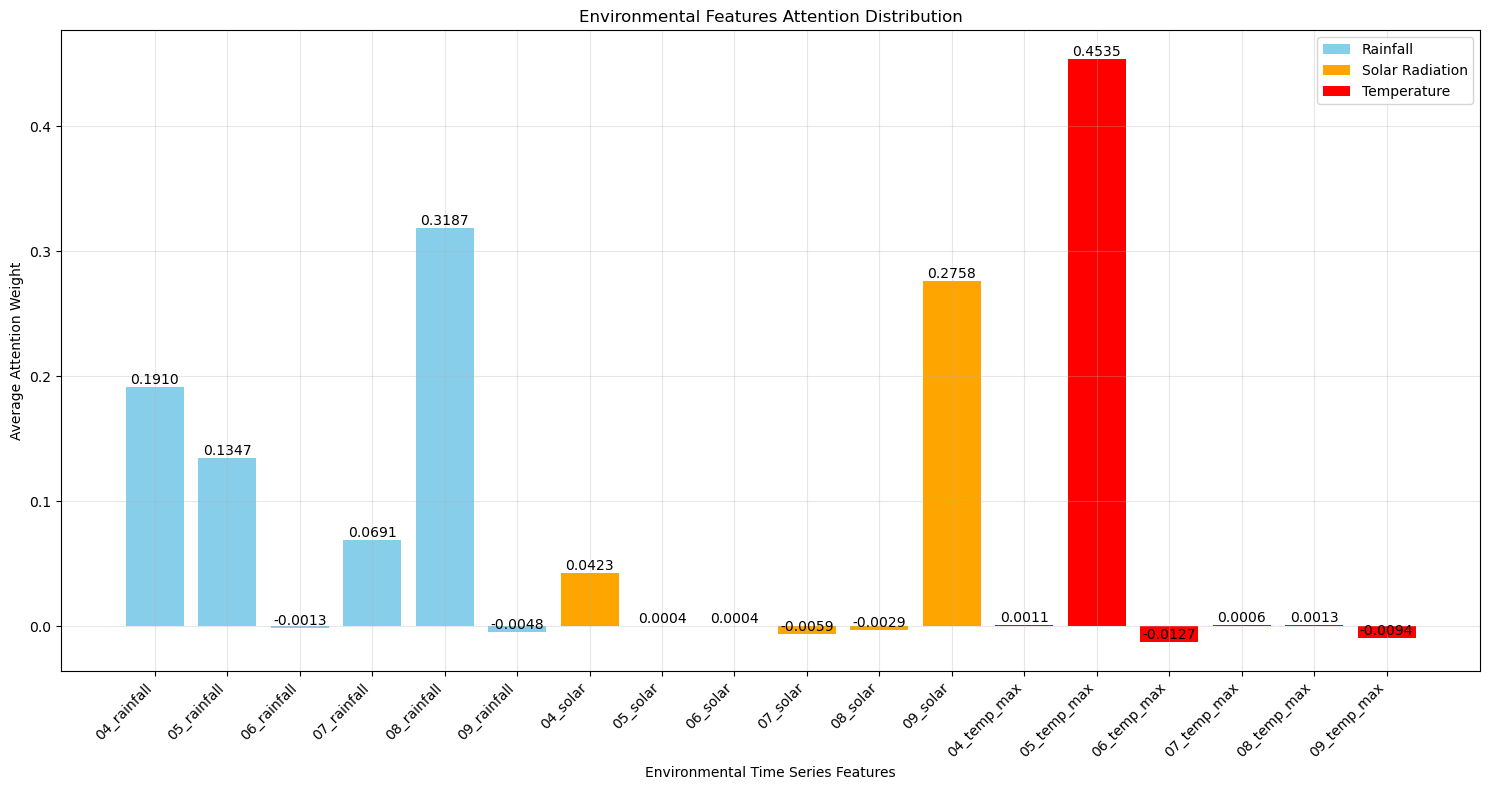


Generating Genetic Markers visualization...


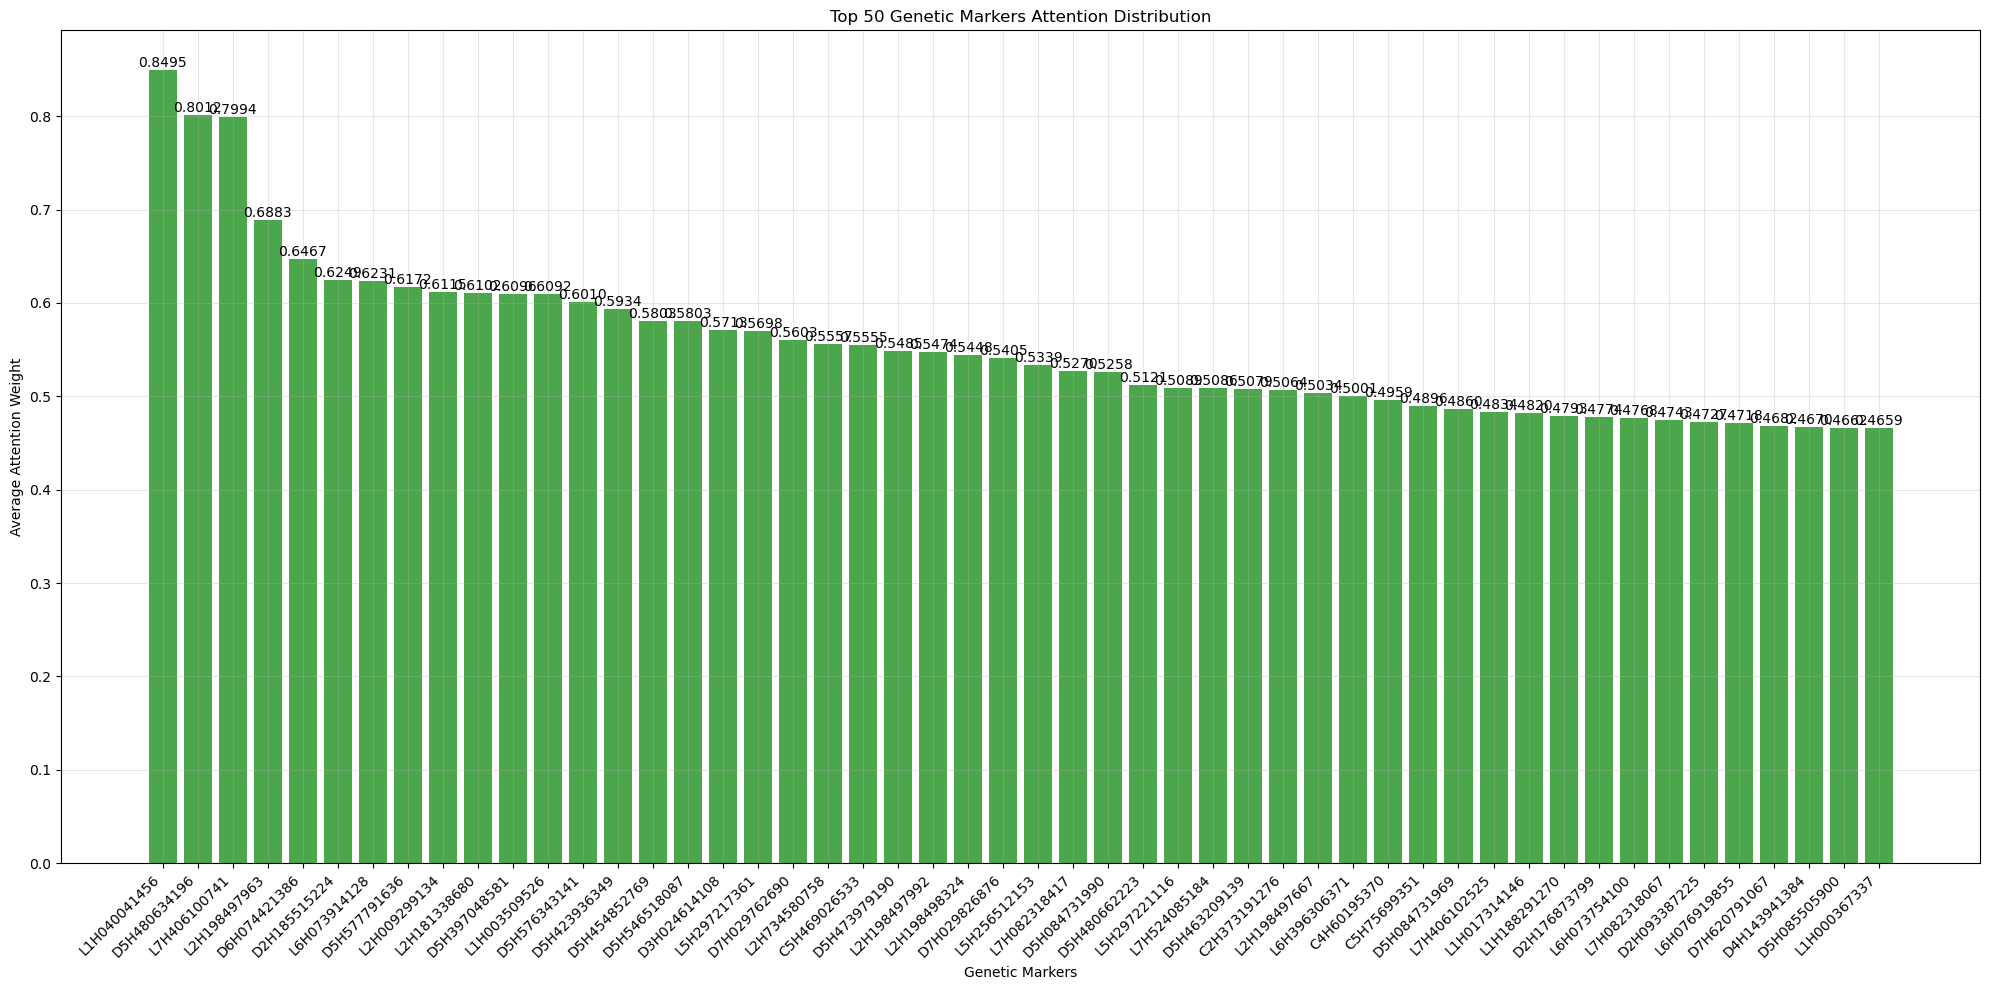


Top 50 Most Important Features:
--------------------------------------------------------------------------------
 1. L1H040041456                                       | Weight: 0.8495 | Type: Genetic
 2. D5H480634196                                       | Weight: 0.8012 | Type: Genetic
 3. L7H406100741                                       | Weight: 0.7994 | Type: Genetic
 4. L2H198497963                                       | Weight: 0.6883 | Type: Genetic
 5. D6H074421386                                       | Weight: 0.6467 | Type: Genetic
 6. D2H185515224                                       | Weight: 0.6249 | Type: Genetic
 7. L6H073914128                                       | Weight: 0.6231 | Type: Genetic
 8. D5H577791636                                       | Weight: 0.6172 | Type: Genetic
 9. L2H009299134                                       | Weight: 0.6115 | Type: Genetic
10. L2H181338680                                       | Weight: 0.6102 | Type: Genetic
11. D5

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, LSTM, Dense, Dropout, Conv1D,
                                   MaxPooling1D, Flatten, Concatenate, BatchNormalization,
                                   Reshape)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow.keras.backend as K

class MultiInputAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(MultiInputAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(
            name="att_weight",
            shape=(input_shape[-1], 1),
            initializer="glorot_uniform",
            trainable=True
        )
        self.b = self.add_weight(
            name="att_bias",
            shape=(input_shape[1], 1),
            initializer="zeros",
            trainable=True
        )
        super(MultiInputAttention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)
def prepare_hybrid_model_data(dataset_rainfall, dataset_solar, dataset_temperature, dataset_gene,
                            sequence_length=6, test_size=0.2, random_state=42):
    """
    Prepare data for hybrid LSTM-CNN model ensuring aligned target variables
    """
    # Extract target variable
    target = dataset_gene['GrYld(kg/ha)'].values

    # Prepare LSTM inputs
    scaler_rainfall = StandardScaler()
    scaler_solar = StandardScaler()
    scaler_temp = StandardScaler()

    # Scale the time series data
    scaled_rainfall = scaler_rainfall.fit_transform(dataset_rainfall.drop('GrYld(kg/ha)', axis=1))
    scaled_solar = scaler_solar.fit_transform(dataset_solar.drop('GrYld(kg/ha)', axis=1))
    scaled_temp = scaler_temp.fit_transform(dataset_temperature.drop('GrYld(kg/ha)', axis=1))

    # Reshape for LSTM (samples, time steps, features)
    X_rainfall = scaled_rainfall.reshape(-1, sequence_length, 1)
    X_solar = scaled_solar.reshape(-1, sequence_length, 1)
    X_temp = scaled_temp.reshape(-1, sequence_length, 1)

    # Prepare CNN input
    scaler_gene = StandardScaler()
    X_gene = dataset_gene.drop('GrYld(kg/ha)', axis=1).values
    X_gene_scaled = scaler_gene.fit_transform(X_gene)
    X_gene_reshaped = X_gene_scaled.reshape(X_gene_scaled.shape[0], X_gene_scaled.shape[1], 1)

    # Split the data
    from sklearn.model_selection import train_test_split

    X_rainfall_train, X_rainfall_test, \
    X_solar_train, X_solar_test, \
    X_temp_train, X_temp_test, \
    X_gene_train, X_gene_test, \
    y_train, y_test = train_test_split(X_rainfall, X_solar, X_temp,
                                      X_gene_reshaped, target,
                                      test_size=test_size,
                                      random_state=random_state)

    return {
        'X_rainfall_train': X_rainfall_train,
        'X_rainfall_test': X_rainfall_test,
        'X_solar_train': X_solar_train,
        'X_solar_test': X_solar_test,
        'X_temp_train': X_temp_train,
        'X_temp_test': X_temp_test,
        'X_gene_train': X_gene_train,
        'X_gene_test': X_gene_test,
        'y_train': y_train,
        'y_test': y_test,
        'scalers': {
            'rainfall': scaler_rainfall,
            'solar': scaler_solar,
            'temperature': scaler_temp,
            'gene': scaler_gene
        }
    }

def get_predictions_and_attention(model, prepared_data):
    """
    Create a new model that outputs predictions and attention weights
    """
    attention_layer_name = 'multi_input_attention'
    attention_model = tf.keras.Model(
        inputs=model.inputs,
        outputs=[model.output, model.get_layer(attention_layer_name).output]
    )

    return attention_model.predict([
        prepared_data['X_rainfall_test'],
        prepared_data['X_solar_test'],
        prepared_data['X_temp_test'],
        prepared_data['X_gene_test']
    ])

def get_feature_names(dataset_gene):
    """
    Generate feature names using actual names from dataset
    """
    # Environmental feature names with units
    rainfall_features = [f'Total Rainfall at t-{i} (mm)' for i in range(6, 0, -1)]
    solar_features = [f'Solar Radiation at t-{i} (MJ/m²)' for i in range(6, 0, -1)]
    temp_features = [f'Temperature at t-{i} (°C)' for i in range(6, 0, -1)]

    # Get actual gene names from dataset
    gene_features = list(dataset_gene.drop('GrYld(kg/ha)', axis=1).columns)

    return rainfall_features + solar_features + temp_features + gene_features

def plot_top_50_features(attention_weights, feature_names):
    """
    Plot top 50 features based on average attention weights
    """
    # Calculate average attention weights across samples
    avg_attention = np.mean(attention_weights, axis=0)

    # Ensure we're only using the number of features we have names for
    avg_attention = avg_attention[:len(feature_names)]

    # Get indices of top 50 features
    n_top = min(50, len(feature_names))
    top_indices = np.argsort(avg_attention)[-n_top:][::-1]
    top_weights = avg_attention[top_indices]
    top_features = [feature_names[i] for i in top_indices]

    # Create color mapping
    colors = []
    for feature in top_features:
        if 'Rainfall' in feature or 'Total Rainfall' in feature:
            colors.append('skyblue')
        elif 'Solar' in feature:
            colors.append('orange')
        elif 'Temperature' in feature or 'Temp' in feature:
            colors.append('red')
        else:  # Gene features
            colors.append('green')

    # Create figure
    plt.figure(figsize=(20, 12))
    bars = plt.bar(range(n_top), top_weights, color=colors)

    # Customize plot
    plt.xticks(range(n_top), top_features, rotation=90, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Average Attention Weight')
    plt.title(f'Top {n_top} Most Important Features Based on Attention Weights')

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom')

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='skyblue', label='Rainfall'),
        Patch(facecolor='orange', label='Solar Radiation'),
        Patch(facecolor='red', label='Temperature'),
        Patch(facecolor='green', label='Genetic Marker')
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('top_50_features.png', dpi=300, bbox_inches='tight')
    plt.show()
def plot_lstm_attention(attention_weights, feature_names):
    """
    Plot attention weights for environmental features
    """
    # Calculate average attention weights for environmental features
    avg_attention = np.mean(attention_weights, axis=0)
    lstm_weights = avg_attention[:18]

    # Correct environmental feature names
    lstm_features = [
        '04_rainfall', '05_rainfall', '06_rainfall', '07_rainfall', '08_rainfall', '09_rainfall',
        '04_solar', '05_solar', '06_solar', '07_solar', '08_solar', '09_solar',
        '04_temp_max', '05_temp_max', '06_temp_max', '07_temp_max', '08_temp_max', '09_temp_max'
    ]

    plt.figure(figsize=(15, 8))

    # Create color mapping
    colors = ['skyblue']*6 + ['orange']*6 + ['red']*6

    # Plot bars
    bars = plt.bar(range(18), lstm_weights, color=colors)

    # Customize plot
    plt.xticks(range(18), lstm_features, rotation=45, ha='right')
    plt.xlabel('Environmental Time Series Features')
    plt.ylabel('Average Attention Weight')
    plt.title('Environmental Features Attention Distribution')

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom')

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='skyblue', label='Rainfall'),
        Patch(facecolor='orange', label='Solar Radiation'),
        Patch(facecolor='red', label='Temperature')
    ]
    plt.legend(handles=legend_elements)

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('environmental_features_attention.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_cnn_attention(attention_weights, feature_names, dataset_gene):
    """
    Plot attention weights for top 50 genetic features
    """
    # Calculate average attention weights for genetic features
    avg_attention = np.mean(attention_weights, axis=0)
    gene_weights = avg_attention[18:]  # After 18 features are genetic features

    # Get actual genetic marker names from dataset
    gene_features = list(dataset_gene.drop('GrYld(kg/ha)', axis=1).columns)

    # Ensure we have the same number of weights and features
    if len(gene_weights) != len(gene_features):
        print(f"Warning: Number of weights ({len(gene_weights)}) doesn't match number of features ({len(gene_features)})")
        gene_weights = gene_weights[:len(gene_features)]

    # Get top 50 genetic features
    n_top = min(50, len(gene_weights))
    top_indices = np.argsort(gene_weights)[-n_top:][::-1]
    top_weights = gene_weights[top_indices]
    top_features = [gene_features[i] for i in top_indices]

    plt.figure(figsize=(20, 10))

    # Plot bars
    bars = plt.bar(range(n_top), top_weights, color='green', alpha=0.7)

    # Customize plot
    plt.xticks(range(n_top), top_features, rotation=45, ha='right')
    plt.xlabel('Genetic Markers')
    plt.ylabel('Average Attention Weight')
    plt.title(f'Top {n_top} Genetic Markers Attention Distribution')

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('genetic_markers_attention.png', dpi=300, bbox_inches='tight')
    plt.show()


def analyze_attention(attention_weights, feature_names):
    """
    Print detailed analysis of feature importance
    """
    # Calculate average attention weights
    avg_attention = np.mean(attention_weights, axis=0)
    avg_attention = avg_attention[:len(feature_names)]

    # Get top 50 features
    n_top = min(50, len(feature_names))
    top_indices = np.argsort(avg_attention)[-n_top:][::-1]
    top_weights = avg_attention[top_indices]
    top_features = [feature_names[i] for i in top_indices]

    print(f"\nTop {n_top} Most Important Features:")
    print("-" * 80)
    for i, (feature, weight) in enumerate(zip(top_features, top_weights), 1):
        feature_type = ('Environmental' if any(x in feature for x in ['Rainfall', 'Solar', 'Temperature'])
                       else 'Genetic')
        print(f"{i:2d}. {feature:<50} | Weight: {weight:.4f} | Type: {feature_type}")

    # Feature type distribution
    feature_types = {
        'Rainfall': sum(1 for f in top_features if 'Rainfall' in f or 'Total Rainfall' in f),
        'Solar Radiation': sum(1 for f in top_features if 'Solar' in f),
        'Temperature': sum(1 for f in top_features if 'Temperature' in f or 'Temp' in f),
        'Genetic': sum(1 for f in top_features if not any(x in f for x in ['Rainfall', 'Solar', 'Temperature', 'Temp']))
    }

    print(f"\nFeature Type Distribution in Top {n_top}:")
    print("-" * 60)
    for ftype, count in feature_types.items():
        percentage = (count / n_top) * 100
        print(f"{ftype:<15} | Count: {count:2d} | Percentage: {percentage:5.1f}%")

try:
    # Load model and get predictions/attention weights
    model = load_model('model.keras',
                      custom_objects={'MultiInputAttention': MultiInputAttention})

    predictions, attention_weights = get_predictions_and_attention(model, prepared_data)

    # Print debugging information
    print(f"Attention weights shape: {attention_weights.shape}")
    print(f"Number of feature names: {len(feature_names)}")
    print(f"First few feature names: {feature_names[:5]}")

    # Generate visualization and analysis
    plot_top_50_features(attention_weights, feature_names)

    print("\nGenerating Environmental Features visualization...")
    plot_lstm_attention(attention_weights, feature_names)

    print("\nGenerating Genetic Markers visualization...")
    plot_cnn_attention(attention_weights, feature_names, dataset_gene)

    analyze_attention(attention_weights, feature_names)

except Exception as e:
    print(f"Error occurred: {str(e)}")
    import traceback
    traceback.print_exc()

17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step
Attention weights shape: (524, 488832)


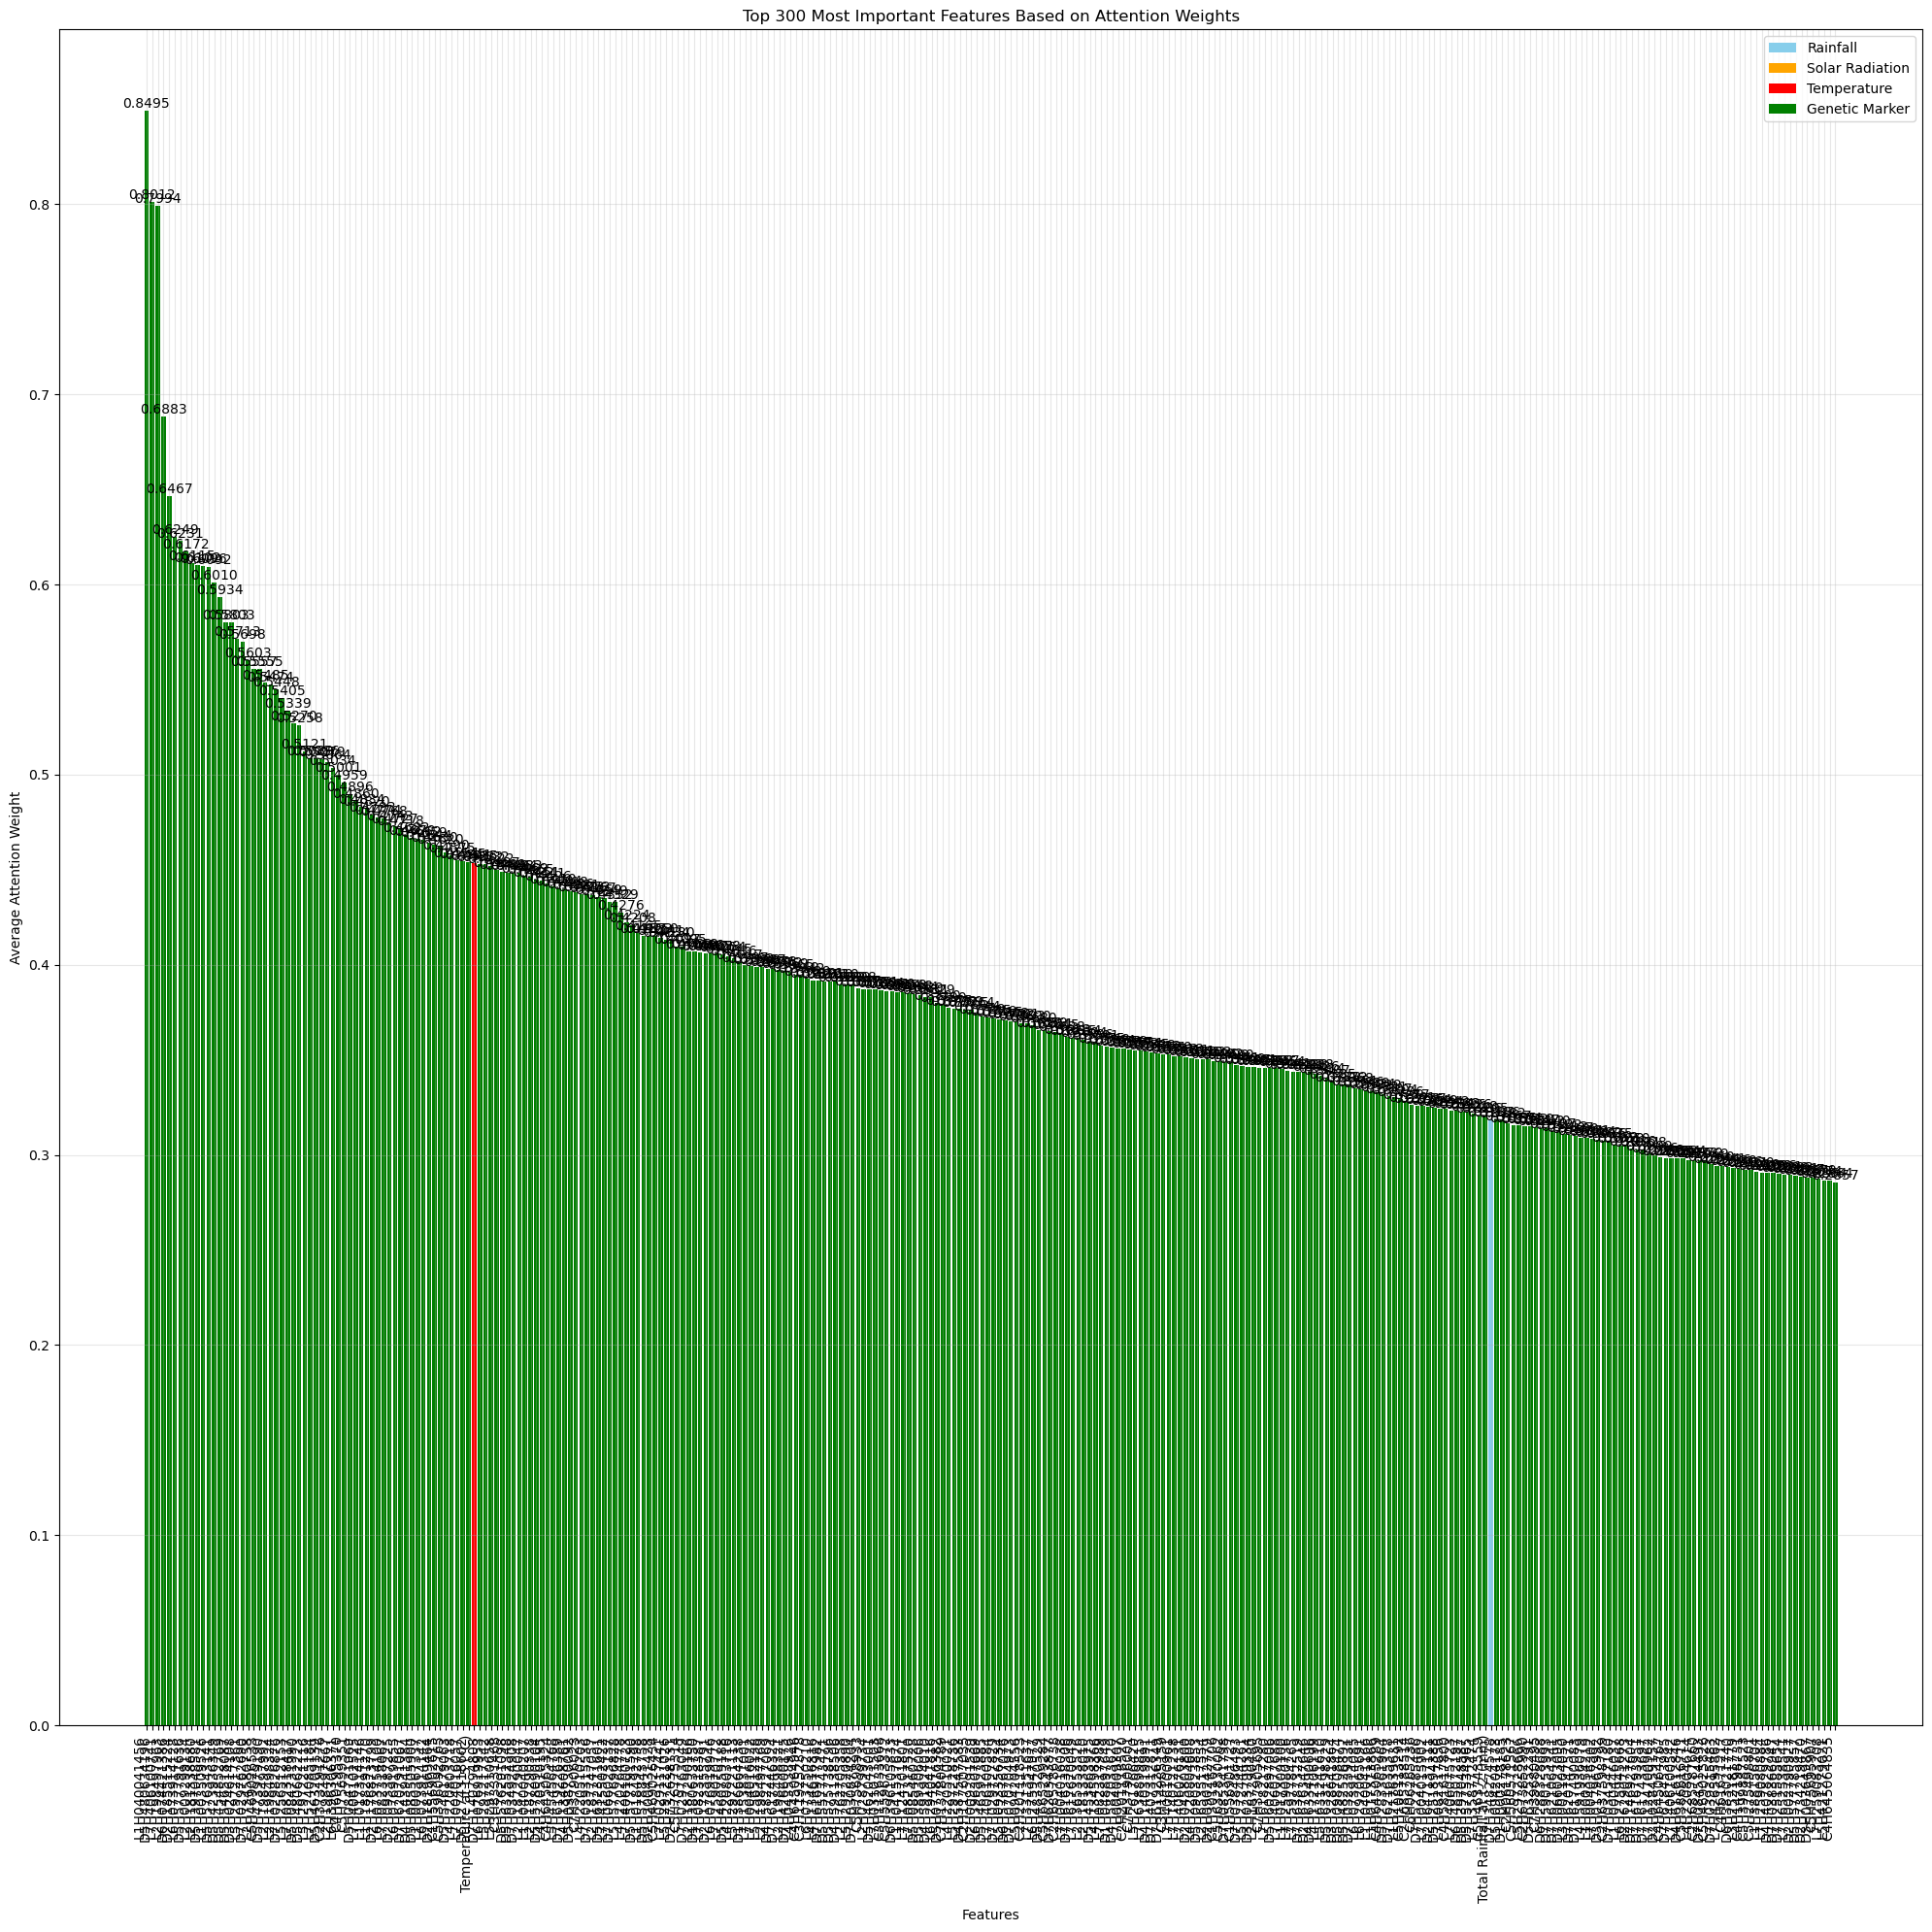


Top 300 Most Important Features:
--------------------------------------------------------------------------------
 1. L1H040041456                                       | Weight: 0.8495 | Type: Genetic
 2. D5H480634196                                       | Weight: 0.8012 | Type: Genetic
 3. L7H406100741                                       | Weight: 0.7994 | Type: Genetic
 4. L2H198497963                                       | Weight: 0.6883 | Type: Genetic
 5. D6H074421386                                       | Weight: 0.6467 | Type: Genetic
 6. D2H185515224                                       | Weight: 0.6249 | Type: Genetic
 7. L6H073914128                                       | Weight: 0.6231 | Type: Genetic
 8. D5H577791636                                       | Weight: 0.6172 | Type: Genetic
 9. L2H009299134                                       | Weight: 0.6115 | Type: Genetic
10. L2H181338680                                       | Weight: 0.6102 | Type: Genetic
11. D

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import (Input, LSTM, Dense, Dropout, Conv1D,
                                   MaxPooling1D, Flatten, Concatenate, BatchNormalization,
                                   Reshape)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow.keras.backend as K
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class MultiInputAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(MultiInputAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(
            name="att_weight",
            shape=(input_shape[-1], 1),
            initializer="glorot_uniform",
            trainable=True
        )
        self.b = self.add_weight(
            name="att_bias",
            shape=(input_shape[1], 1),
            initializer="zeros",
            trainable=True
        )
        super(MultiInputAttention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

def prepare_hybrid_model_data(dataset_rainfall, dataset_solar, dataset_temperature, dataset_gene,
                            sequence_length=6, test_size=0.2, random_state=42):
    target = dataset_gene['GrYld(kg/ha)'].values

    scaler_rainfall = StandardScaler()
    scaler_solar = StandardScaler()
    scaler_temp = StandardScaler()

    scaled_rainfall = scaler_rainfall.fit_transform(dataset_rainfall.drop('GrYld(kg/ha)', axis=1))
    scaled_solar = scaler_solar.fit_transform(dataset_solar.drop('GrYld(kg/ha)', axis=1))
    scaled_temp = scaler_temp.fit_transform(dataset_temperature.drop('GrYld(kg/ha)', axis=1))

    X_rainfall = scaled_rainfall.reshape(-1, sequence_length, 1)
    X_solar = scaled_solar.reshape(-1, sequence_length, 1)
    X_temp = scaled_temp.reshape(-1, sequence_length, 1)

    scaler_gene = StandardScaler()
    X_gene = dataset_gene.drop('GrYld(kg/ha)', axis=1).values
    X_gene_scaled = scaler_gene.fit_transform(X_gene)
    X_gene_reshaped = X_gene_scaled.reshape(X_gene_scaled.shape[0], X_gene_scaled.shape[1], 1)

    X_rainfall_train, X_rainfall_test, \
    X_solar_train, X_solar_test, \
    X_temp_train, X_temp_test, \
    X_gene_train, X_gene_test, \
    y_train, y_test = train_test_split(X_rainfall, X_solar, X_temp,
                                       X_gene_reshaped, target,
                                       test_size=test_size,
                                       random_state=random_state)

    return {
        'X_rainfall_train': X_rainfall_train,
        'X_rainfall_test': X_rainfall_test,
        'X_solar_train': X_solar_train,
        'X_solar_test': X_solar_test,
        'X_temp_train': X_temp_train,
        'X_temp_test': X_temp_test,
        'X_gene_train': X_gene_train,
        'X_gene_test': X_gene_test,
        'y_train': y_train,
        'y_test': y_test,
        'scalers': {
            'rainfall': scaler_rainfall,
            'solar': scaler_solar,
            'temperature': scaler_temp,
            'gene': scaler_gene
        }
    }

def get_predictions_and_attention(model, prepared_data):
    attention_layer_name = 'multi_input_attention'
    attention_model = tf.keras.Model(
        inputs=model.inputs,
        outputs=[model.output, model.get_layer(attention_layer_name).output]
    )

    return attention_model.predict([
        prepared_data['X_rainfall_test'],
        prepared_data['X_solar_test'],
        prepared_data['X_temp_test'],
        prepared_data['X_gene_test']
    ])

def get_feature_names(dataset_gene):
    rainfall_features = [f'Total Rainfall at t-{i} (mm)' for i in range(6, 0, -1)]
    solar_features = [f'Solar Radiation at t-{i} (MJ/m²)' for i in range(6, 0, -1)]
    temp_features = [f'Temperature at t-{i} (°C)' for i in range(6, 0, -1)]
    gene_features = list(dataset_gene.drop('GrYld(kg/ha)', axis=1).columns)

    return rainfall_features + solar_features + temp_features + gene_features

def plot_top_300_features(attention_weights, feature_names):
    avg_attention = np.mean(attention_weights, axis=0)
    avg_attention = avg_attention[:len(feature_names)]

    n_top = min(300, len(feature_names))
    top_indices = np.argsort(avg_attention)[-n_top:][::-1]
    top_weights = avg_attention[top_indices]
    top_features = [feature_names[i] for i in top_indices]

    colors = []
    for feature in top_features:
        if 'Rainfall' in feature:
            colors.append('skyblue')
        elif 'Solar' in feature:
            colors.append('orange')
        elif 'Temperature' in feature:
            colors.append('red')
        else:
            colors.append('green')

    plt.figure(figsize=(20, 20))
    bars = plt.bar(range(n_top), top_weights, color=colors)
    plt.xticks(range(n_top), top_features, rotation=90, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Average Attention Weight')
    plt.title(f'Top {n_top} Most Important Features Based on Attention Weights')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height,
                 f'{height:.4f}', ha='center', va='bottom')

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='skyblue', label='Rainfall'),
        Patch(facecolor='orange', label='Solar Radiation'),
        Patch(facecolor='red', label='Temperature'),
        Patch(facecolor='green', label='Genetic Marker')
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('top_300_features.png', dpi=300, bbox_inches='tight')
    plt.show()

def analyze_attention(attention_weights, feature_names):
    avg_attention = np.mean(attention_weights, axis=0)
    avg_attention = avg_attention[:len(feature_names)]

    n_top = min(300, len(feature_names))
    top_indices = np.argsort(avg_attention)[-n_top:][::-1]
    top_weights = avg_attention[top_indices]
    top_features = [feature_names[i] for i in top_indices]

    print(f"\nTop {n_top} Most Important Features:")
    print("-" * 80)
    for i, (feature, weight) in enumerate(zip(top_features, top_weights), 1):
        feature_type = ('Environmental' if any(x in feature for x in ['Rainfall', 'Solar', 'Temperature'])
                        else 'Genetic')
        print(f"{i:2d}. {feature:<50} | Weight: {weight:.4f} | Type: {feature_type}")

    feature_types = {
        'Rainfall': sum(1 for f in top_features if 'Rainfall' in f),
        'Solar Radiation': sum(1 for f in top_features if 'Solar' in f),
        'Temperature': sum(1 for f in top_features if 'Temperature' in f),
        'Genetic': sum(1 for f in top_features if not any(x in f for x in ['Rainfall', 'Solar', 'Temperature']))
    }

    print(f"\nFeature Type Distribution in Top {n_top}:")
    print("-" * 60)
    for ftype, count in feature_types.items():
        percentage = (count / n_top) * 100
        print(f"{ftype:<15} | Count: {count:2d} | Percentage: {percentage:5.1f}%")

try:
    model = load_model('model.keras', custom_objects={'MultiInputAttention': MultiInputAttention})
    prepared_data = prepare_hybrid_model_data(dataset_rainfall, dataset_solar, dataset_temp, dataset_gene)
    predictions, attention_weights = get_predictions_and_attention(model, prepared_data)

    print(f"Attention weights shape: {attention_weights.shape}")
    feature_names = get_feature_names(dataset_gene)
    plot_top_300_features(attention_weights, feature_names)
    analyze_attention(attention_weights, feature_names)

except Exception as e:
    print(f"Error: {e}")
